In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Activation
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.models import load_model
from sklearn.preprocessing import scale
import keras.layers
import keras.optimizers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import csv
import random

In [ ]:
#Data preparation

In [ ]:
Data = pd.read_csv('/home/thiago/Development/IME/cea2/data_dim_nova.csv').iloc[:, 8:54]
Data = Data.fillna(method='ffill')

In [ ]:
Data.describe()

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
Data_scaled = min_max_scaler.fit_transform(Data)
Data_scaled = pd.DataFrame(Data_scaled)

In [ ]:
Data_scaled.describe()

In [12]:
X = Data_scaled.as_matrix()[:22141, :].reshape((22141, 1, 46))
Y = Data_scaled.as_matrix()[1:, :].reshape((22141, 1, 46))
print(X.shape)
print(Y.shape)

(22141, 1, 46)
(22141, 1, 46)


/home/thiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/thiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.1, random_state=4)

In [14]:
#RNN

In [15]:
def simular(input_shape, hidden_size = 128):
    inputs = Input(input_shape)
    X = Bidirectional(LSTM(hidden_size, return_sequences = True))(inputs)
    X = Dense(input_shape[-1])(X)
    outputs = Activation('sigmoid')(X)
    
    model = Model(inputs = inputs, outputs = outputs)
    return model
    

In [17]:
model = simular((1, 46))

W1008 11:40:46.561539 139891957966656 deprecation_wrapper.py:119] From /home/thiago/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1, 46)             0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1, 256)            179200    
_________________________________________________________________
dense_1 (Dense)              (None, 1, 46)             11822     
_________________________________________________________________
activation_1 (Activation)    (None, 1, 46)             0         
Total params: 191,022
Trainable params: 191,022
Non-trainable params: 0
_________________________________________________________________


In [19]:
adam = keras.optimizers.adam(lr = 0.0001)

In [20]:
model.compile(loss='mean_absolute_error', optimizer=adam, metrics=['accuracy'])

W1008 11:40:50.476387 139891957966656 deprecation_wrapper.py:119] From /home/thiago/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [21]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

W1008 11:40:56.883421 139891957966656 deprecation.py:323] From /home/thiago/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1008 11:40:57.616565 139891957966656 deprecation_wrapper.py:119] From /home/thiago/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1008 11:40:57.698112 139891957966656 deprecation_wrapper.py:119] From /home/thiago/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 19926 samples, validate on 2215 samples
Epoch 1/50
19926/19926 [==============================] - 5s 257us/step - loss: 0.1164 - acc: 0.2419 - val_loss: 0.0874 - val_acc: 0.4018
Epoch 2/50
19926/19926 [==============================] - 2s 117us/step - loss: 0.0718 - acc: 0.4280 - val_loss: 0.0616 - val_acc: 0.4447
Epoch 3/50
19926/19926 [==============================] - 2s 118us/step - loss: 0.0565 - acc: 0.4792 - val_loss: 0.0533 - val_acc: 0.4822
Epoch 4/50
19926/19926 [==============================] - 2s 118us/step - loss: 0.0503 - acc: 0.5086 - val_loss: 0.0481 - val_acc: 0.5047
Epoch 5/50
19926/19926 [==============================] - 3s 136us/step - loss: 0.0458 - acc: 0.5327 - val_loss: 0.0441 - val_acc: 0.5278
Epoch 6/50
19926/19926 [==============================] - 3s 132us/step - loss: 0.0423 - acc: 0.5529 - val_loss: 0.0409 - val_acc: 0.5467
Epoch 7/50
19926/19926 [==============================] - 3s 128us/step - loss: 0.0395 - acc: 0.5655 - val_loss: 0.0383 - v

In [22]:
#model.save('rnn_base_nova.h5')
#model.save('../rnn_base_nova_bem_deepzona.h5')
#model = load_model('rnn_base_nova.h5')

#model = load_model('./modelo_com_todos_os_jogos.h5')
model.save('./simular_Bidirectional_LSTM.h5')

In [23]:
results = model.predict(x_test)

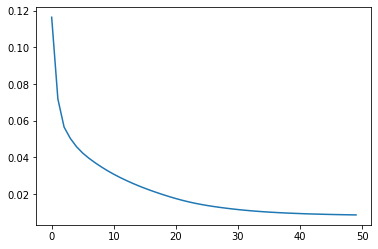

In [24]:
plt.plot(history.history['loss'])
plt.show()

In [25]:
print(results.shape)
print(y_test.shape)

(2215, 1, 46)
(2215, 1, 46)


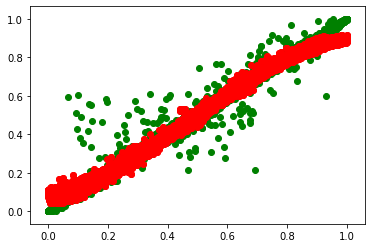

In [26]:
plt.scatter(x_test, results, c='r')
plt.scatter(x_test, y_test, c='g')
plt.scatter(x_test, results, c='r')
plt.show()

In [30]:
X[1]

array([[0.07403608, 0.56700166, 0.30899567, 0.14831643, 0.22426166,
        0.5704804 , 0.24245327, 0.44020734, 0.3507705 , 0.59601577,
        0.3976862 , 0.46208869, 0.41558805, 0.3802632 , 0.45474371,
        0.6068439 , 0.47471439, 0.31853378, 0.47365203, 0.785749  ,
        0.3903598 , 0.4651262 , 0.99951512, 0.39403098, 0.56011182,
        0.40106587, 0.5072354 , 0.44540423, 0.55530375, 0.41305451,
        0.5809108 , 0.36188577, 0.59688892, 0.63967265, 0.61809441,
        0.49721395, 0.46815456, 0.46003959, 0.56098482, 0.35206947,
        0.56278072, 0.60842252, 0.54779621, 0.45594888, 0.4849611 ,
        0.49108464]])

In [31]:
start = X[1]
start = np.array(start)
start = np.reshape(start, (1, 1, 46))

jogo_simulado = [start]
next_step = start
for i in range(1000):
    next_step = model.predict(next_step)
    jogo_simulado.append(next_step)

jogo_simulado = np.array(jogo_simulado)
print(jogo_simulado.shape)  
jogo_simulado = np.reshape(jogo_simulado, (1001, 46))
print(jogo_simulado.shape)  

(1001, 1, 1, 46)
(1001, 46)


In [33]:
np.min(jogo_simulado)

0.07403608305619866

In [34]:
jogo_simulado_unscaled = min_max_scaler.inverse_transform(jogo_simulado)

In [36]:
np.max(jogo_simulado_unscaled)

106.35400870000001

In [38]:
np.savetxt('jogo_simulado.txt', jogo_simulado_unscaled, delimiter=',')